In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    '''
    输入：
    x：数组
    输出：
    z：经过sigmoud函数计算后的数组
    '''
    z =1 / (1+np.exp(-x))
    return z


In [3]:
def initialize_params(dims):
    '''
    输入：
    dims：参数维度
    输出：
    z：初始化后的参数向量w和参数值b
    '''
    W = np.zeros((dims,1))
    b = 0
    return W,b


In [4]:
def logistic(X,y,W,b):
    '''
    输入：
    X: 输入特征矩阵
    y: 输出标签向量
    W: 权值参数
    b: 偏置参数
    输出：
    a: 逻辑回归模型输出
    cost: 损失
    dW: 权值梯度
    db: 偏置梯度
    '''
    # 训练样本量
    num_train = X.shape[0]
    # 训练特征数
    num_feature = X.shape[1]
    # 逻辑回归模型输出
    a = sigmoid(np.dot(X, W) + b)
    # 交叉熵损失
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    # 权值梯度
    dW = np.dot(X.T, (a-y))/num_train
    # 偏置梯度
    db = np.sum(a-y)/num_train
    # 压缩损失数组维度
    cost = np.squeeze(cost) 
    #np.aqueeze()函数不改变数组内容，起作用是从数组形状中删去单维度条目
    #在机器学习和深度学习中，通常算法的结果是可以表示向量的数组（即包含两对或以上的方括号形式[[]]）
    #如果直接利用这个数组进行画图可能显示界面为空（见后面的示例）。我们可以利用squeeze（）
    #函数将表示向量的数组转换为秩为1的数组，这样利用matplotlib库函数画图时，就可以正常的显示结果了
    return a, cost, dW, db

In [5]:
### 定义逻辑回归模型训练过程
def logistic_train(X, y, learning_rate, epochs):
    '''
    输入：
    X: 输入特征矩阵
    y: 输出标签向量
    learning_rate: 学习率
    epochs: 训练轮数
    输出：
    cost_list: 损失列表
    params: 模型参数
    grads: 参数梯度
    '''
    # 初始化模型参数
    W, b = initialize_params(X.shape[1])  
    # 初始化损失列表
    cost_list = []  
    
    # 迭代训练
    for i in range(epochs):
        # 计算当前次的模型计算结果、损失和参数梯度
        a, cost, dW, db = logistic(X, y, W, b)    
        # 参数更新
        W = W -learning_rate * dW
        b = b -learning_rate * db        
        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)   
        # 打印训练过程中的损失 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 
               
    # 保存参数
    params = {            
        'W': W,            
        'b': b
    }        

    # 保存梯度
    grads = {            
        'dW': dW,            
        'db': db
    }                
    return cost_list, params, grads

In [6]:
### 定义预测函数
def predict(X, params):
    '''
    输入：
    X: 输入特征矩阵
    params: 训练好的模型参数
    输出：
    y_prediction: 转换后的模型预测值
    '''
    # 模型预测值
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b'])
    # 基于分类阈值对概率预测值进行类别转换
    for i in range(len(y_prediction)):        
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
            
    return y_prediction

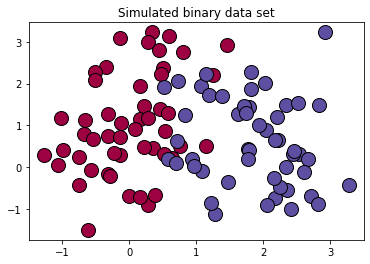

In [57]:
# 导入matplotlib绘图库
import matplotlib.pyplot as plt
# 导入生成分类数据函数
from sklearn.datasets._samples_generator import make_classification
# 生成100*2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)
# 设置随机数种子
rng = np.random.RandomState(2)
# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)
# 标签类别数
unique_lables = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
# 绘制模拟数据的散点图
for k,col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor="k",
             markersize=14)
plt.title('Simulated binary data set')
plt.show();

In [58]:
#均匀分布
rng1 = np.random.RandomState(2)
rng1.uniform(size=2)

array([0.4359949 , 0.02592623])

In [59]:
labb = [1,1,1,2,2,3,3,3,3]
set(labb)#类别
np.linspace(0,1,len(unique_lables))

array([0., 1.])

In [67]:
tt =  np.array([[1,2,3]
              ,[4,5,6]
              ,[7,8,9]])
tt[:,1]
tt[0:1,0]
tt[:1]#取到1号位不包含1
tt[1:]#从1号位开始取

array([], shape=(0, 3), dtype=int64)

In [61]:
print(X.shape, labels.shape)

(100, 2) (100,)


In [62]:
labels = labels.reshape((-1, 1))
data = np.concatenate((X, labels), axis=1)#axis=0 列数相同拼接行
print(data.shape)

(100, 3)


In [64]:
labels
X

array([[ 2.17221697, -0.73380144],
       [ 2.54116921,  0.31055925],
       [-0.00718884, -0.70554359],
       [-0.31285288, -0.17275221],
       [-0.67290531,  0.79310561],
       [ 2.02921038,  2.00123297],
       [ 1.08611755, -0.09763082],
       [ 2.05115043,  0.89470152],
       [ 0.63571715,  0.21832237],
       [ 1.62773   ,  1.27186472],
       [-0.32183734,  0.73302972],
       [ 0.15987326,  1.15688899],
       [ 1.07772608,  1.94968322],
       [-1.0635294 ,  0.05584284],
       [-0.34910535,  2.4031323 ],
       [ 1.79445338,  1.44806611],
       [ 0.8308001 ,  1.23959808],
       [ 1.72040584,  1.46399449],
       [ 0.79631556,  2.76496387],
       [-0.75617817,  0.24619723],
       [ 0.35992886,  0.45946866],
       [ 1.2533517 ,  2.20890892],
       [-0.13977217,  0.71166153],
       [ 1.76970567,  0.43802158],
       [ 0.2186094 ,  0.48193463],
       [ 0.45578826,  1.38594564],
       [-0.13179231,  0.29248123],
       [ 0.33435907,  3.22902956],
       [-0.75794556,

In [68]:
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [69]:
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

epoch 0 cost 0.693147
epoch 100 cost 0.554066
epoch 200 cost 0.480953
epoch 300 cost 0.434738
epoch 400 cost 0.402395
epoch 500 cost 0.378275
epoch 600 cost 0.359468
epoch 700 cost 0.344313
epoch 800 cost 0.331783
epoch 900 cost 0.321216


In [70]:
params

{'W': array([[ 1.55740577],
        [-0.46456883]]),
 'b': -0.5944518853151362}

In [71]:
y_pred = predict(X_test, params)
print(y_pred)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [72]:
sigmoid(np.dot(X_test, params['W']) + params['b'])

array([[0.27936388],
       [0.92347241],
       [0.90814155],
       [0.24192851],
       [0.94789076],
       [0.98545445],
       [0.29242059],
       [0.06128463],
       [0.95821867],
       [0.46214622]])

In [73]:
from sklearn.metrics import accuracy_score, classification_report
# print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [75]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):
        for j in range(len(y_pred)):
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1
            
    accuracy_score = correct_count / len(y_test)
    return accuracy_score

accuracy_score_test = accuracy(y_test, y_pred)
print(accuracy_score_test)

1.0


In [86]:
accuracy_score_train = accuracy(y_train, sigmoid(np.dot(X_train,params['W'])) + params['b'])
print(accuracy_score_train)

0.0


In [89]:
X_train

array([[ 2.17221697, -0.73380144],
       [ 2.54116921,  0.31055925],
       [-0.00718884, -0.70554359],
       [-0.31285288, -0.17275221],
       [-0.67290531,  0.79310561],
       [ 2.02921038,  2.00123297],
       [ 1.08611755, -0.09763082],
       [ 2.05115043,  0.89470152],
       [ 0.63571715,  0.21832237],
       [ 1.62773   ,  1.27186472],
       [-0.32183734,  0.73302972],
       [ 0.15987326,  1.15688899],
       [ 1.07772608,  1.94968322],
       [-1.0635294 ,  0.05584284],
       [-0.34910535,  2.4031323 ],
       [ 1.79445338,  1.44806611],
       [ 0.8308001 ,  1.23959808],
       [ 1.72040584,  1.46399449],
       [ 0.79631556,  2.76496387],
       [-0.75617817,  0.24619723],
       [ 0.35992886,  0.45946866],
       [ 1.2533517 ,  2.20890892],
       [-0.13977217,  0.71166153],
       [ 1.76970567,  0.43802158],
       [ 0.2186094 ,  0.48193463],
       [ 0.45578826,  1.38594564],
       [-0.13179231,  0.29248123],
       [ 0.33435907,  3.22902956],
       [-0.75794556,

In [87]:
X_train[1][1]

0.31055924594920103

In [88]:
X_train[:5]

array([[ 2.17221697, -0.73380144],
       [ 2.54116921,  0.31055925],
       [-0.00718884, -0.70554359],
       [-0.31285288, -0.17275221],
       [-0.67290531,  0.79310561]])

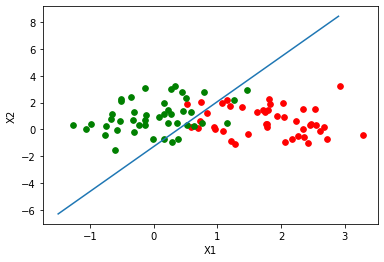

In [94]:
### 绘制逻辑回归决策边界
def plot_logistic(X_train, y_train, params):
    '''
    输入：
    X_train: 训练集输入
    y_train: 训练集标签
    params：训练好的模型参数
    输出：
    决策边界图
    '''
    # 训练样本量
    n = X_train.shape[0]
    # 初始化类别坐标点列表
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 获取两类坐标点并存入列表
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
    # 创建绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    # 取值范围
    x = np.arange(-1.5, 3, 0.1)
    # 决策边界公式
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]
    # 绘图
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
plot_logistic(X_train, y_train, params)

In [95]:
params

{'W': array([[ 1.55740577],
        [-0.46456883]]),
 'b': -0.5944518853151362}

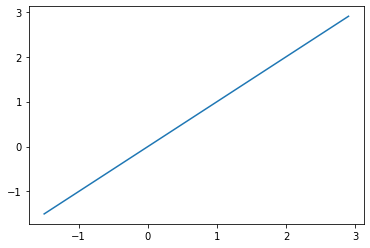

In [106]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
x = np.arange(-1.5, 3, 0.1)
y =  x 
ax1.plot(x,y)

(90, 2) (90, 1) (10, 2) (10, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.521480
epoch 200 cost 0.416359
epoch 300 cost 0.347951
epoch 400 cost 0.300680
epoch 500 cost 0.266327
epoch 600 cost 0.240328
epoch 700 cost 0.220002
epoch 800 cost 0.203687
epoch 900 cost 0.190306
{'W': array([[ 2.04608084],
       [-0.03964634]]), 'b': 0.12335926234285086}
train accuracy is: 0.9666666666666667
test accuracy is: 1.0


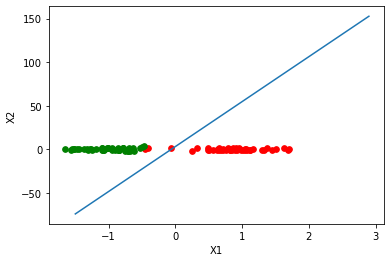

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_classification

class logistic_regression():
    def __init__(self):
        pass

    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))
        return z

    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b

    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        a = self.sigmoid(np.dot(X, W) + b)
        cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

        dW = np.dot(X.T, (a - y)) / num_train
        db = np.sum(a - y) / num_train
        cost = np.squeeze(cost)

        return a, cost, dW, db

    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        cost_list = []

        for i in range(epochs):
            a, cost, dW, db = self.logistic(X, y, W, b)
            W = W - learning_rate * dW
            b = b - learning_rate * db

            if i % 100 == 0:
                cost_list.append(cost)
            if i % 100 == 0:
                print('epoch %d cost %f' % (i, cost))

        params = {
            'W': W,
            'b': b
        }
        grads = {
            'dW': dW,
            'db': db
        }

        return cost_list, params, grads

    def predict(self, X, params):
        y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])

        for i in range(len(y_prediction)):
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0

        return y_prediction

    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):
            for j in range(len(y_pred)):
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)
        return accuracy_score

    def create_data(self):
        X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2,
                                        random_state=1, n_clusters_per_class=2)
        labels = labels.reshape((-1, 1))
        offset = int(X.shape[0] * 0.9)
        X_train, y_train = X[:offset], labels[:offset]
        X_test, y_test = X[offset:], labels[offset:]
        return X_train, y_train, X_test, y_test

    def plot_logistic(self, X_train, y_train, params):
        n = X_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []
        for i in range(n):
            if y_train[i] == 1:
                xcord1.append(X_train[i][0])
                ycord1.append(X_train[i][1])
            else:
                xcord2.append(X_train[i][0])
                ycord2.append(X_train[i][1])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='green')
        x = np.arange(-1.5, 3, 0.1)
        y = (-params['b'] - params['W'][0] * x) / params['W'][1]
        ax.plot(x, y)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()


if __name__ == "__main__":
    model = logistic_regression()
    X_train, y_train, X_test, y_test = model.create_data()
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
    print(params)
    y_train_pred = model.predict(X_train, params)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:', accuracy_score_train)
    y_test_pred = model.predict(X_test, params)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:', accuracy_score_test)
    model.plot_logistic(X_train, y_train, params)

In [109]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

/Users/heshuaichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

